In [1]:
# General imports
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import tensorflow as tf
# from sklearn.preprocessing import normalize

# Neurophox imports
from neurophox.numpy import *
from neurophox.tensorflow import *
from neurophox.ml.nonlinearities import cnorm, cnormsq
from neurophox.initializers import *
from neurophox.components import *
from neurophox.helpers import *

In [5]:
class PhaseInitializer(MeshPhaseInitializer):
    """
    User-specified initialization of rectangular and triangular mesh architectures.

    Args:
        phase: Phase to initialize
        units: Input dimension, :math:`N`
    """

    def __init__(self, phase: np.ndarray, units: int):
        self.phase, self.units = phase, units
        super(PhaseInitializer, self).__init__(units, self.phase.shape[0])

    def to_np(self) -> np.ndarray:
        return self.phase.astype(NP_FLOAT)

Basic unit simulation
$$ U_2(\theta, \phi) = B \cdot R(\theta) \cdot B \cdot R(\phi) = i \begin{bmatrix} e^{i \phi}\sin \frac{\theta}{2} & \cos \frac{\theta}{2} \\\\
        e^{i \phi}\cos \frac{\theta}{2} & -\sin \frac{\theta}{2} \end{bmatrix} $$
![Alt text](image.png)

In [153]:
mzi.BlochMZI(0, 0, False).matrix

array([[0.+0.j, 0.+1.j],
       [0.+1.j, 0.+0.j]])

In [135]:
input = 4
depth = 1
layer = RMNumpy(input, depth)
type(layer)

neurophox.numpy.layers.RMNumpy

Phases are stored in arrays of size `(depth, input // 2)` 

In [136]:
layer.theta

array([[1.44017885, 2.48465949]])

In [138]:
layer.phi

array([[2.10340849, 3.32631874]])

In [140]:
HaarRandomPhaseInitializer(4, 5).to_np()

array([[1.75036799, 1.8018539 ],
       [0.74876412, 0.        ],
       [2.2065949 , 1.56428062],
       [1.23219666, 0.        ],
       [1.26697316, 1.92253901]])

In [154]:
units = 7
a = ConstantPhaseInitializer(units, units, np.pi/4).to_np() # 
b = ConstantPhaseInitializer(2*units, 1, 0).to_np()

In [155]:
a

array([[0.78539816, 0.78539816, 0.78539816],
       [0.78539816, 0.78539816, 0.78539816],
       [0.78539816, 0.78539816, 0.78539816],
       [0.78539816, 0.78539816, 0.78539816],
       [0.78539816, 0.78539816, 0.78539816],
       [0.78539816, 0.78539816, 0.78539816],
       [0.78539816, 0.78539816, 0.78539816]])

In [156]:
MeshPhases(a, a, b)

In [28]:
test = RMNumpy(3, theta

In [30]:
test.phases.theta.param

array([[0.07270435],
       [2.70819913],
       [1.81948186]])

In [51]:
test.phases.phi.param

array([[3.15877717],
       [2.49461025],
       [2.20933119]])

In [52]:
test.phases.internal_phase_shifts

array([[ 0.60697159,  0.31099923,  0.56216369],
       [-0.60697159, -0.31099923, -0.56216369],
       [ 0.        ,  0.        ,  0.        ]])

In [23]:
test.phases.internal_phase_shift_layers

array([[5.31755520e-01+0.84689791j, 6.12323400e-17+1.j        ,
        3.92609043e-01+0.91970546j],
       [5.31755520e-01-0.84689791j, 6.12323400e-17-1.j        ,
        3.92609043e-01-0.91970546j]])

In [24]:
test.phases.external_phase_shifts

array([[4.14514526, 3.14159265, 0.0704377 ],
       [0.        , 0.        , 0.        ]])

In [ ]:
test.phases.external_phase_shifts

In [2]:
mesh = RMNumpy(4)

In [3]:
mesh.phases.internal_phase_shifts

array([[ 1.16399871,  0.30440566,  0.6152424 ,  0.93678246],
       [-1.16399871, -0.30440566, -0.6152424 , -0.93678246],
       [ 0.84330719,  1.57079633,  0.62072424,  1.57079633],
       [-0.84330719, -1.57079633, -0.62072424, -1.57079633]])

In [147]:
nplayer = RMNumpy(21, theta_init_name="random_theta")

In [148]:
inp = np.eye(21)[10]

In [149]:
abs(nplayer.propagate(inp)).squeeze()

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 9.55676316e-01, 2.94419395e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 8.34542615e-01, 4.65677832e-01, 3.25775317e-02,
        2.9261

Text(0.5, 1.0, 'Propagation for Haar random $\\theta_{n\\ell}$')

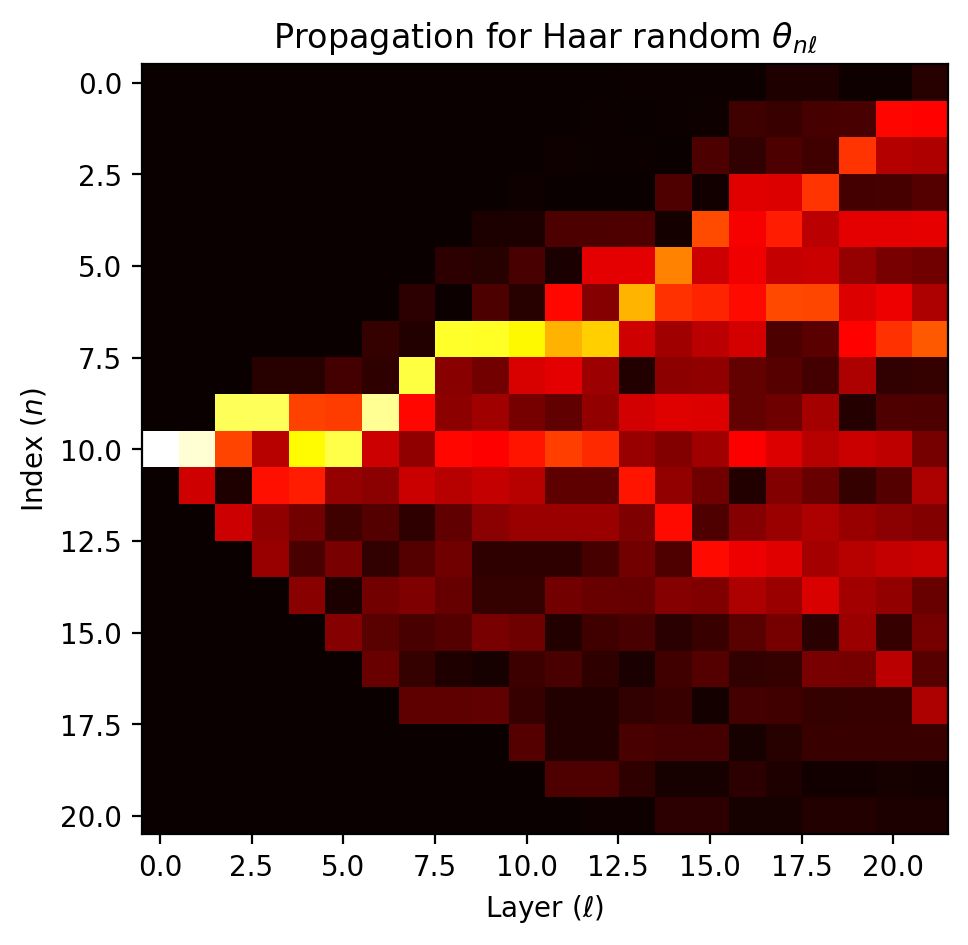

In [150]:
plt.figure(dpi=200, figsize=(10, 5))
plt.imshow(abs(nplayer.propagate(inp)).squeeze().T, cmap='hot')
plt.ylabel("Index ($n$)")
plt.xlabel("Layer ($\ell$)")
plt.title('Propagation for Haar random $\\theta_{n\ell}$')